# Fall 2024 - Project Task #1


1.   Linear Regression
2.   Ridge
3.   Lasso
4.   PCA

## Load Packages/Library

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge , Lasso, LinearRegression, RidgeCV, LassoCV
from sklearn.decomposition import PCA

from statsmodels.api import OLS
import statsmodels.api as sm



## Data Loading & Preprocessing

*   Clean Data & Check outliers
*   Original Data w/o Dummies (data)
*   Data w/ Dummy Variables (data_dummies)

### Load and View Dataset

In [44]:
# Read Data Set
data = pd.read_csv('LaptopPrices.csv')
data.head()


,Company,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [45]:
# Check the shape of data
data.shape


(1275, 22)

### Drop Nulls and Duplicates

In [46]:
# Check Duplicates
data.duplicated().sum()

1

In [47]:
# Check Nulls
data.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,4
Screen,0
ScreenW,0
ScreenH,0


In [48]:
# Drop duplicate data
# Drop null values
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Drop this random row with 'No+J722' as a category
data.drop(data[data['Touchscreen'] == 'No+J722'].index, axis=0, inplace=True)


### Do We Keep Outliers?

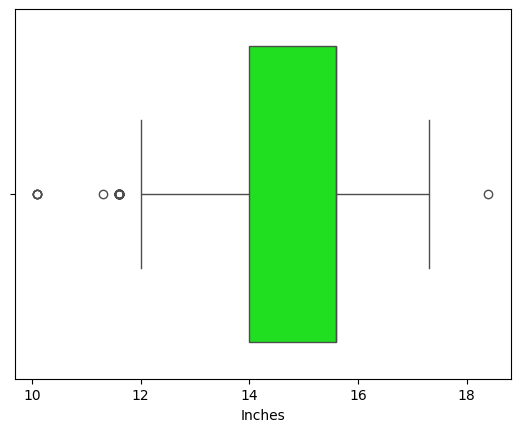

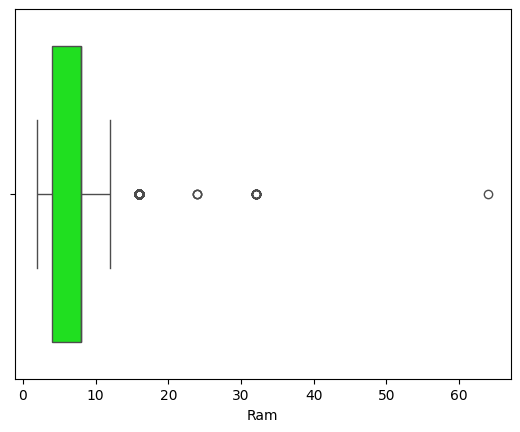

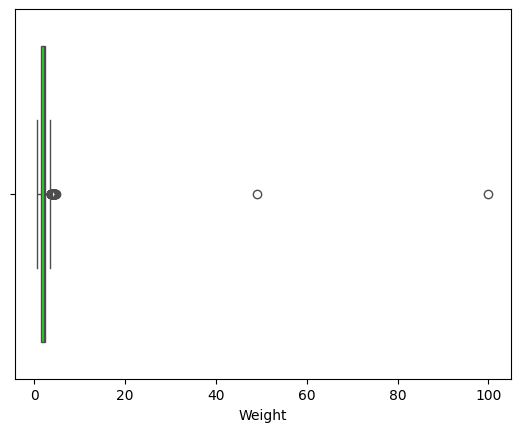

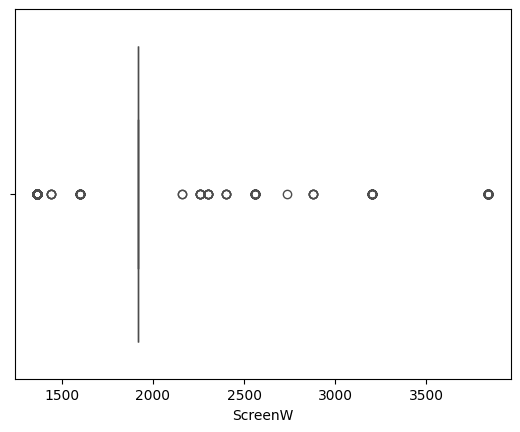

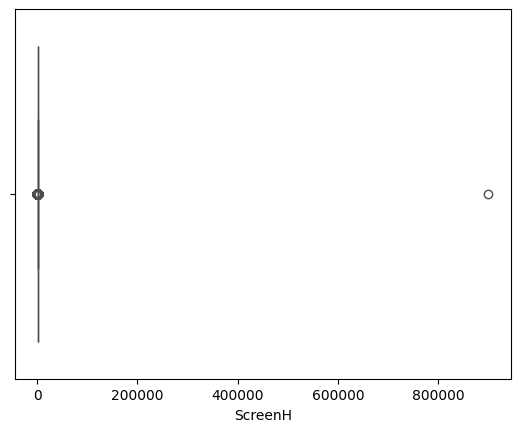

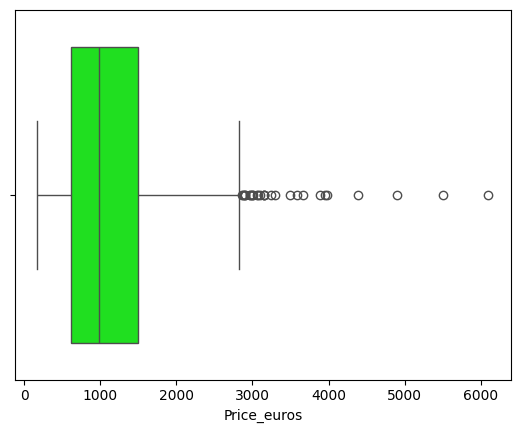

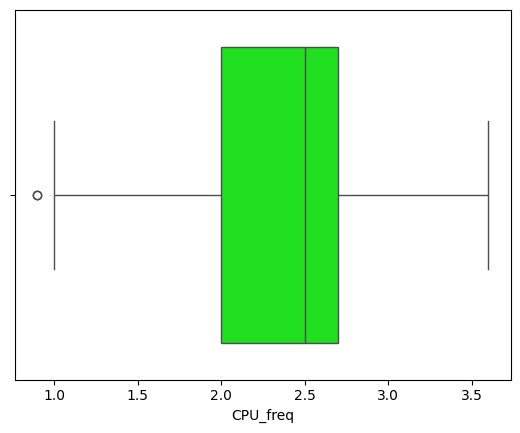

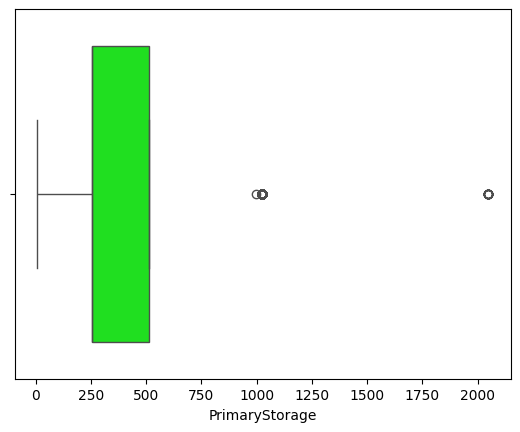

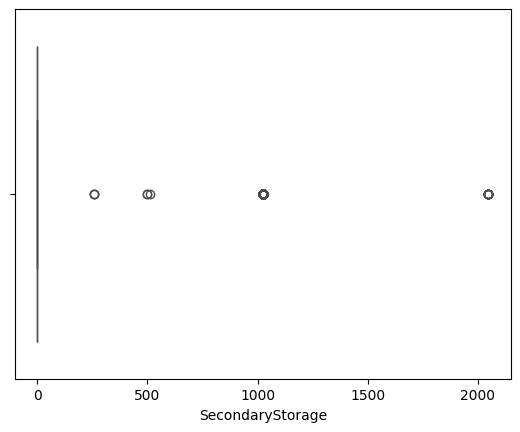

In [49]:
# Check for outliers for each predictor in list
# Some strange values for Weight and Screen Height
variables = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'Price_euros',
             'CPU_freq','PrimaryStorage', 'SecondaryStorage']

for variable in variables:
  sns.boxplot(data=data, x=data[variable], color='lime')
  plt.show()


In [50]:
# Remove not normal/extreme outliers in:  {Weight & Screen Height}

# ----------------------
# WEIGHT (WEIGHT > 5 kg)
# ----------------------
data.drop(data[data['Weight'] > 5].index, axis=0, inplace=True)


# -------------------------------------
# SCREEN HEIGHT (ScreenH > 3000 pixels)
# -------------------------------------
data.drop(data[data['ScreenH'] > 3000].index, axis=0, inplace=True)


# -----------------
#  RAM (RAM < 3 GB)
# -----------------
data.drop(data[(data['Ram'] < 3)].index, axis=0, inplace=True)



In [51]:
# Check the distribution of data after removing non conventional outliers
data.describe()


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000,1248.000000
mean,15.039904,8.520833,2.045833,1148.099639,1908.046474,1078.522436,2.313446,448.217949,178.237179
std,1.421541,5.077859,0.670364,697.808786,494.214711,284.407531,0.497875,365.009014,418.318314
min,10.100000,4.000000,0.690000,196.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,629.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,999.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1499.000000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


### Check data again

In [52]:
# Check duplicates again
data.duplicated().sum()


0

In [53]:
# Check null values again
data.isnull().sum()


,0
Company,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0
ScreenH,0


In [54]:
# Check the data shape
data.shape


(1248, 22)

## Data Exploration


### Correlation Table

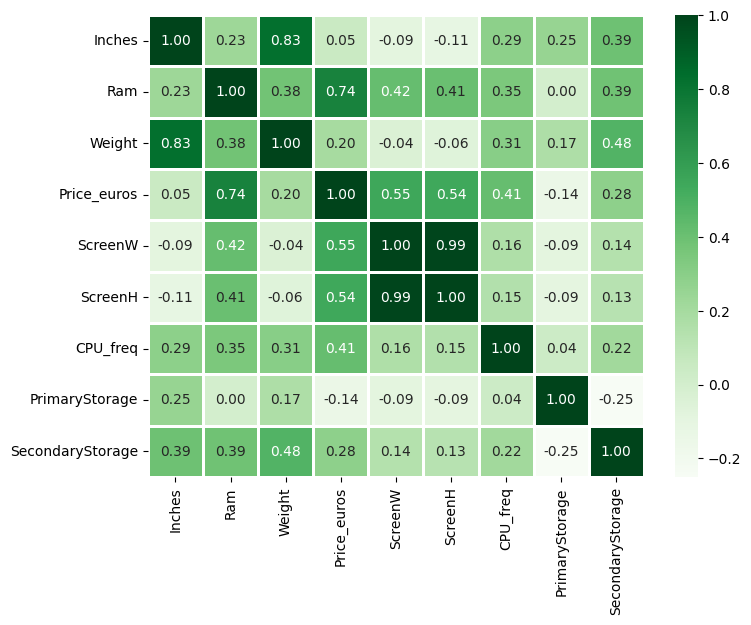

In [55]:
# Correlation Matrix of Numerical Predictors
correlation_matrix = data[['Inches', 'Ram',	'Weight', 'Price_euros', 'ScreenW',
                           'ScreenH',	'CPU_freq',	'PrimaryStorage',	'SecondaryStorage']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Greens', linewidths=2, fmt='0.2f')
plt.show()

### Count plots

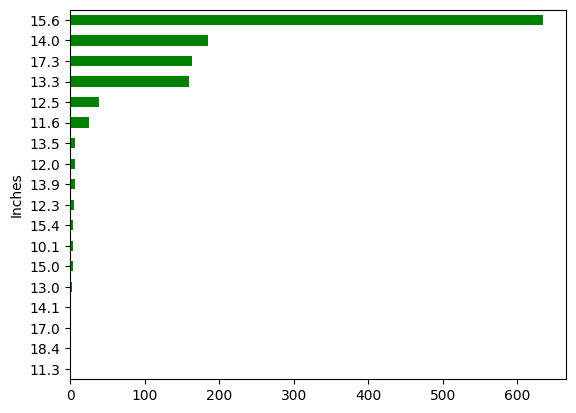

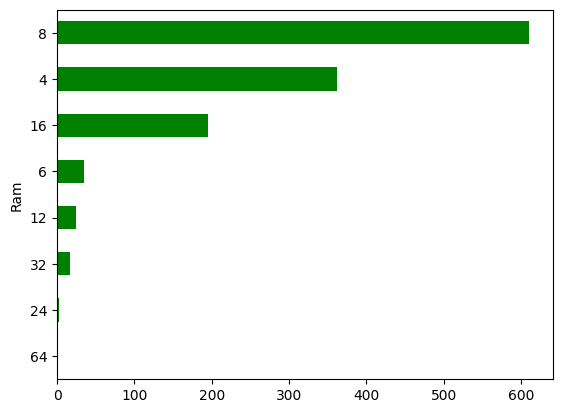

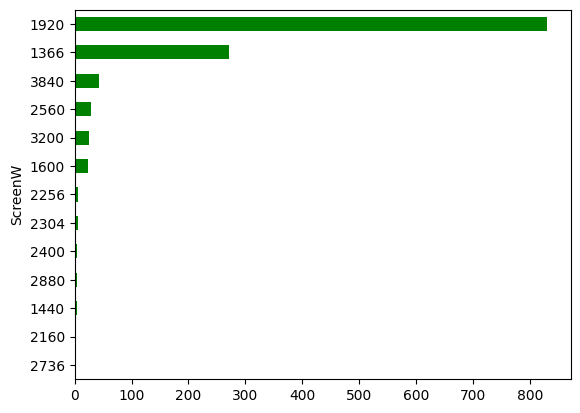

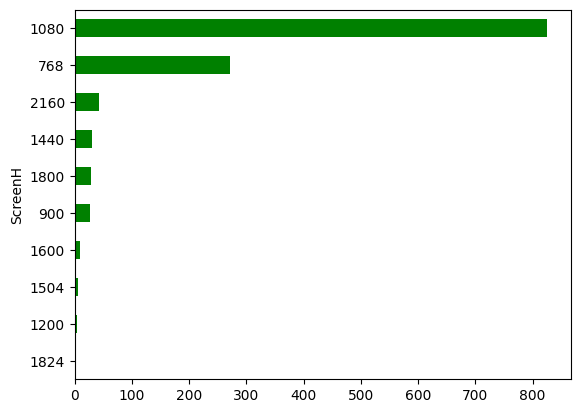

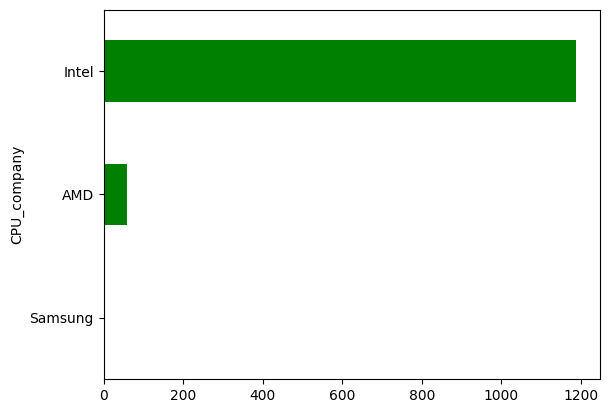

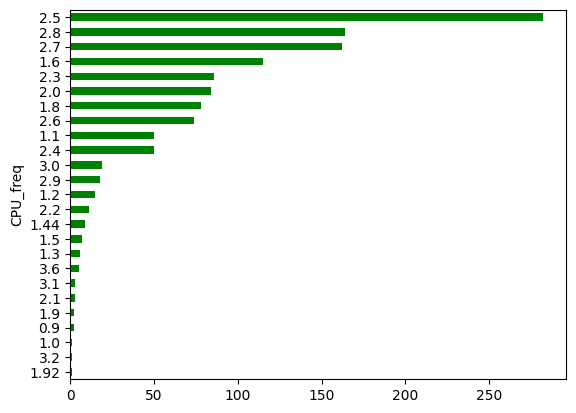

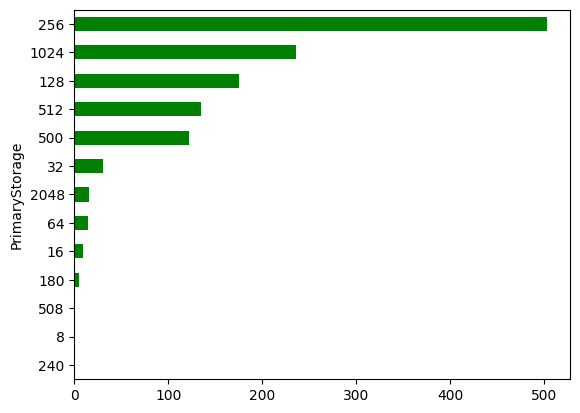

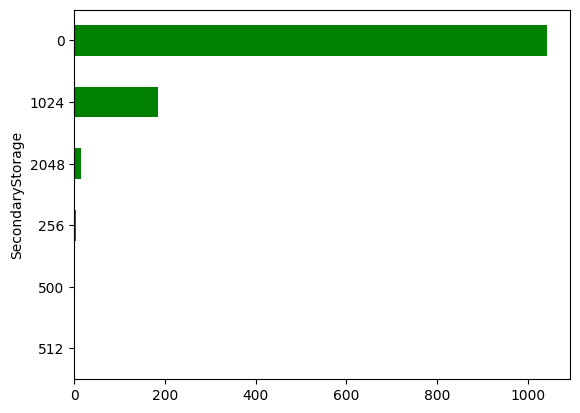

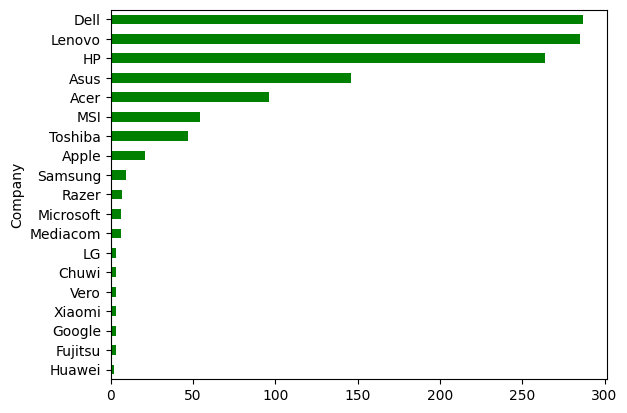

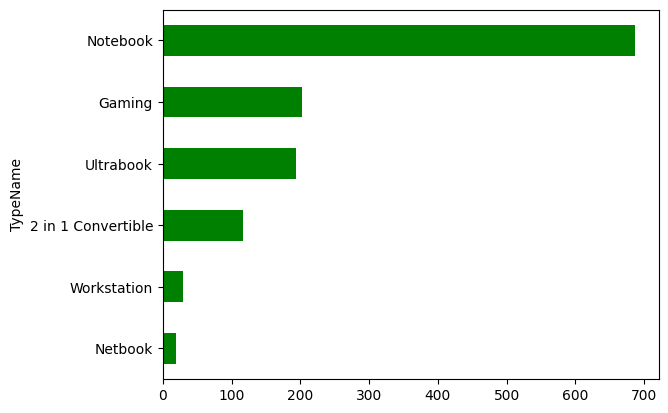

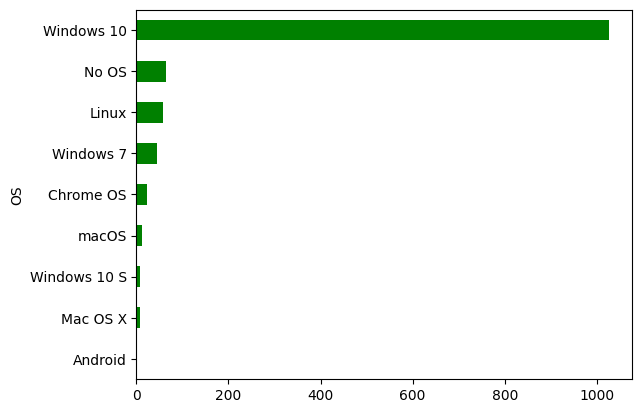

In [56]:
list_of_variables1 = ['Inches', 'Ram', 'ScreenW', 'ScreenH', 'CPU_company',
                     'CPU_freq', 'PrimaryStorage', 'SecondaryStorage',
                     'Company', 'TypeName', 'OS']

for variable in list_of_variables1:
  data[variable].value_counts().sort_values(ascending=True).plot(kind='barh', color='green')
  plt.show()

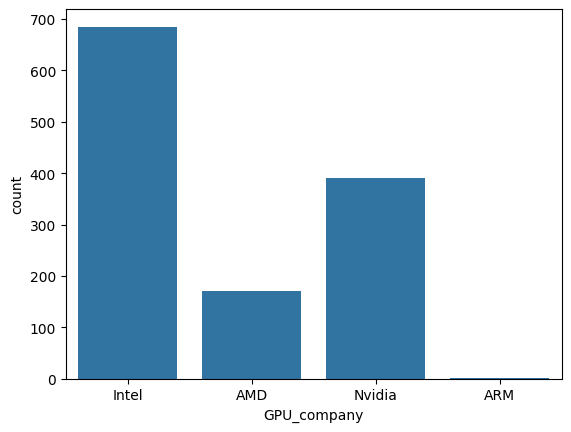

In [57]:
# GPU Company
sns.countplot(data, x='GPU_company')
plt.show()


### Histogram

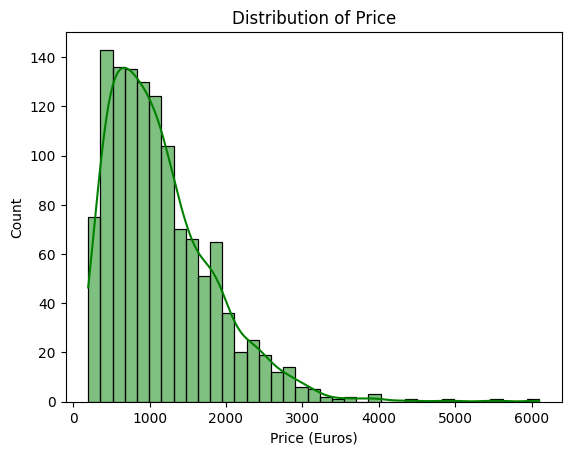

In [58]:
# Price histogram
sns.histplot(data=data, x='Price_euros', kde=True, color='green')
plt.title(f'Distribution of Price')
plt.xlabel(f'Price (Euros)')
plt.show()


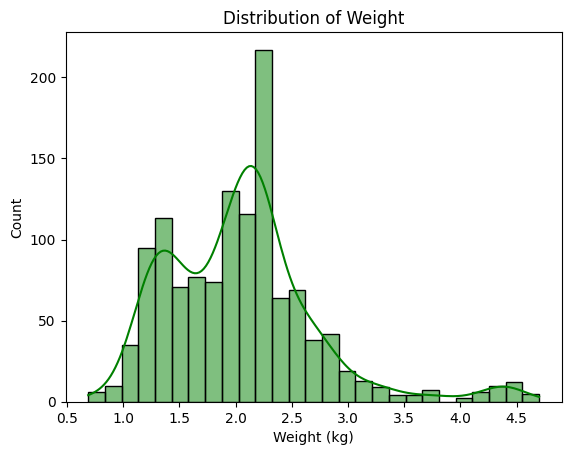

In [59]:
# Weight histogram
sns.histplot(data= data, x=data['Weight'], kde=True, color='green')
plt.title(f'Distribution of Weight')
plt.xlabel(f'Weight (kg)')
plt.show()


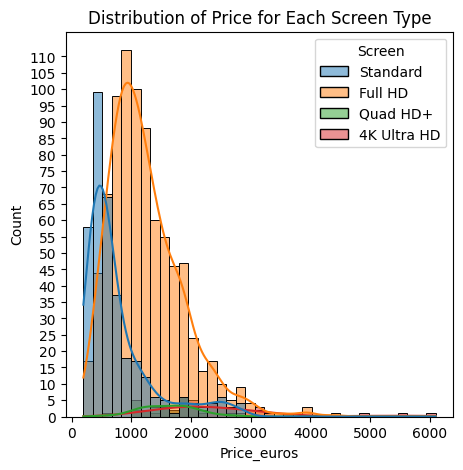

In [60]:
plt.figure(figsize=(5,5))

sns.histplot(data=data, x='Price_euros', kde=True, hue='Screen')
plt.title(f'Distribution of Price for Each Screen Type')
plt.yticks(np.arange(0, 115, 5))
plt.show()

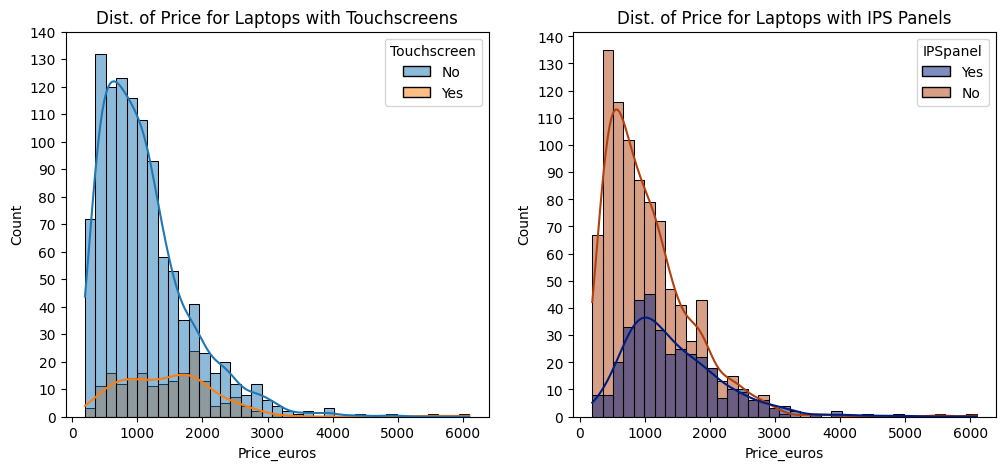

In [61]:
# Plot the distribution of Prices against
# Touchscreen and IPS Panels in their own graphs
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Price_euros', hue='Touchscreen', kde=True)
plt.title(f'Dist. of Price for Laptops with Touchscreens')
plt.yticks(np.arange(0,150,10))


plt.subplot(1, 2, 2)
sns.histplot(data=data, x='Price_euros', hue='IPSpanel', kde=True, palette='dark')
plt.title(f'Dist. of Price for Laptops with IPS Panels')
plt.yticks(np.arange(0,150,10))

plt.show()


### Scatterplot

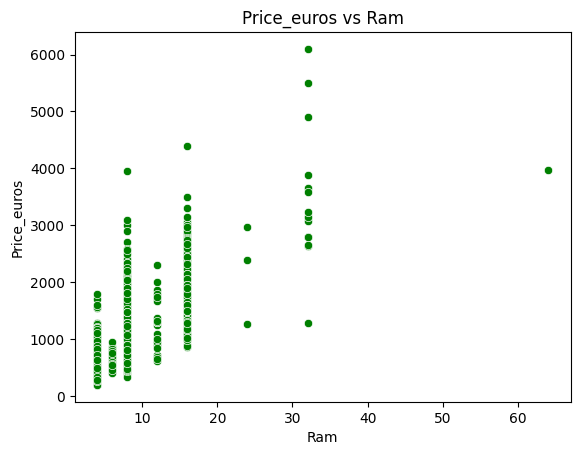

In [62]:
# Scatterplot of Price & Ram
sns.scatterplot(data, x='Ram', y='Price_euros', color='green')
plt.title(f'Price_euros vs Ram')
plt.show()


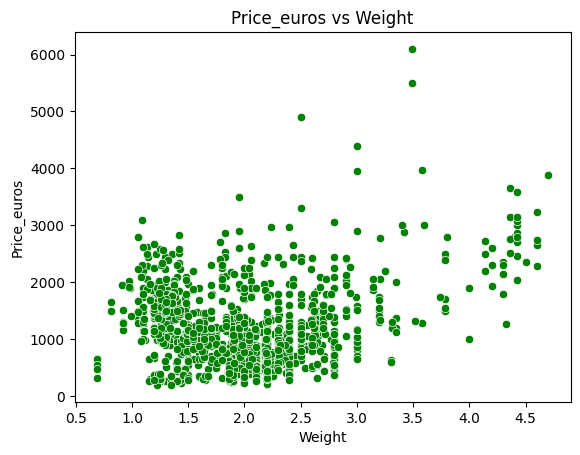

In [63]:
# Scatterplot of Price & Ram
sns.scatterplot(data, x='Weight', y='Price_euros', color='green')
plt.title(f'Price_euros vs Weight')
plt.show()


## Assingn X&Y   |   Train Test Split Data  |   Create another X&Y (scaled)

In [64]:

# -----------------------------------
#   Use this for Ridge, Lasso, PCA
#       Scaling Data Required
# -----------------------------------

scaler = StandardScaler()
data_copy = data.copy()

numerical = ['Inches','Ram','Weight','Price_euros',
             'ScreenW','ScreenH','CPU_freq',
             'PrimaryStorage','SecondaryStorage']

categorical = ['Company', 'TypeName', 'OS', 'Screen',
               'Touchscreen', 'IPSpanel', 'RetinaDisplay',
               'CPU_company', 'CPU_model', 'PrimaryStorageType',
               'SecondaryStorageType', 'GPU_company', 'GPU_model']

# Create a scaled with numerical variables only data set
data_copy[numerical] = scaler.fit_transform(data_copy[numerical])

# Create a dummy with categorical variables only data set
# Make it its own dataset
data_dummies = pd.get_dummies(data=data_copy[categorical],
                              dtype=int)

data_dummies = pd.DataFrame(data_dummies)


# Concatinate the numerical and dummy datasets together and add constant
# Assign x & y
x_final = pd.concat([data_copy[numerical], data_dummies], axis=1)
y_final = x_final['Price_euros']

x_final = sm.add_constant(x_final)
x_final = x_final.drop(['Price_euros'], axis=1)


# Train Test Split scaled data
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(x_final,
                                                                                y_final,
                                                                                test_size=0.2,
                                                                                random_state=8)




In [65]:
# -----------------------------------
#   Use this for Linear Regression
#         No Scaling Data
# -----------------------------------

# Assign x & y and get dummy variables without scaling
x = pd.get_dummies(data, dtype=int)
y = x['Price_euros']

# Drop price feature from x and add constant to x
x = x.drop(['Price_euros'], axis=1)
x = sm.add_constant(x)


# Train Test Split regular data
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=8)


## Multi Linear Regression

### Unscaled MLR

In [ ]:
# Assign mlr the Linear Regression class
# Fit mlr with x & y train
mlr = LinearRegression()
mlr.fit(x_train, y_train)


# Predict using x_train and x_test
preds_train = mlr.predict(x_train)
preds_test = mlr.predict(x_test)


# Calculate training and testing MSE/R2
mse_train = mean_squared_error(y_train, preds_train)
r2_train = r2_score(y_train, preds_train)
print(f'\nTrain MSE: {mse_train}')
print(f'Train R2: {r2_train}\n')

mse_test = mean_squared_error(y_test, preds_test)
r2_test = r2_score(y_test, preds_test)
print(f'\nTest MSE: {mse_test}')
print(f'Test R2: {r2_test}\n')


# Print OLS Table
result = sm.OLS(y, x).fit()
print(result.summary())




Train MSE: 53192.936012167695
Train R2: 0.8974918173010642


Test MSE: 135668.75359625937
Test R2: 0.6139448292915217

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     34.84
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:42:26   Log-Likelihood:                -8562.0
No. Observations:                1248   AIC:                         1.760e+04
Df Residuals:                    1011   BIC:                         1.881e+04
Df Model:                         236                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025 

### Scaled MLR

In [ ]:
# Assign mlr the Linear Regression class
# Fit mlr with x & y train
mlr = LinearRegression()
mlr.fit(x_scaled_train, y_scaled_train)


# Predict using x_train and x_test
preds_train = mlr.predict(x_scaled_train)
preds_test = mlr.predict(x_scaled_test)


# Calculate training and testing MSE/R2
mse_train = mean_squared_error(y_scaled_train, preds_train)
r2_train = r2_score(y_scaled_train, preds_train)
print(f'\nTrain MSE: {mse_train}')
print(f'Train R2: {r2_train}\n')

mse_test = mean_squared_error(y_scaled_test, preds_test)
r2_test = r2_score(y_scaled_test, preds_test)
print(f'\nTest MSE: {mse_test}')
print(f'Test R2: {r2_test}\n')


# Print OLS Table
result = sm.OLS(y_final, x_final).fit()
print(result.summary())



Train MSE: 0.1093266543982163
Train R2: 0.8974925652492937


Test MSE: 1.1032001528971882e+20
Test R2: -1.527385231661698e+20

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     34.84
Date:                Wed, 27 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:42:27   Log-Likelihood:                -390.65
No. Observations:                1248   AIC:                             1255.
Df Residuals:                    1011   BIC:                             2471.
Df Model:                         236                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|     

## Ridge Regression

### Finding Alpha/Lambda Value


In [ ]:
# ---------------------
#  Create Alpha Values
# ---------------------

# Create 100 lambda values
lambda_vals = np.logspace(-5,10,100)
print(f'Lambda Values:\n{lambda_vals}')


# Train and Predict using those lambda values
# to get estimated coefficients and append them
# into a list
ridge_training = Ridge()
ridge_training_coeff = []

for val in lambda_vals:
  ridge_training.set_params(alpha=val)
  ridge_training.fit(x_scaled_train, y_scaled_train)
  ridge_training_coeff.append(ridge_training.coef_)


# Print coefficient list's shape
# There should be 100 lists/arrays of 271 coefficients
# I wont print the coefficient list since its too long
print(f'\nDimensions of Coefficient List:')
np.shape(ridge_training_coeff)



Lambda Values:
[1.00000000e-05 1.41747416e-05 2.00923300e-05 2.84803587e-05
 4.03701726e-05 5.72236766e-05 8.11130831e-05 1.14975700e-04
 1.62975083e-04 2.31012970e-04 3.27454916e-04 4.64158883e-04
 6.57933225e-04 9.32603347e-04 1.32194115e-03 1.87381742e-03
 2.65608778e-03 3.76493581e-03 5.33669923e-03 7.56463328e-03
 1.07226722e-02 1.51991108e-02 2.15443469e-02 3.05385551e-02
 4.32876128e-02 6.13590727e-02 8.69749003e-02 1.23284674e-01
 1.74752840e-01 2.47707636e-01 3.51119173e-01 4.97702356e-01
 7.05480231e-01 1.00000000e+00 1.41747416e+00 2.00923300e+00
 2.84803587e+00 4.03701726e+00 5.72236766e+00 8.11130831e+00
 1.14975700e+01 1.62975083e+01 2.31012970e+01 3.27454916e+01
 4.64158883e+01 6.57933225e+01 9.32603347e+01 1.32194115e+02
 1.87381742e+02 2.65608778e+02 3.76493581e+02 5.33669923e+02
 7.56463328e+02 1.07226722e+03 1.51991108e+03 2.15443469e+03
 3.05385551e+03 4.32876128e+03 6.13590727e+03 8.69749003e+03
 1.23284674e+04 1.74752840e+04 2.47707636e+04 3.51119173e+04
 4.977023

(100, 270)

In [ ]:

# ---------------------------------------
#   Viewing Estimated Coefficients List
#               For Ridge
# ---------------------------------------

ridge_training_coeff[0]



array([ 0.00000000e+00, -6.69363096e-03,  2.83879561e-01, -7.36605911e-02,
       -7.75781574e-01,  1.13065445e+00,  8.55390138e-02,  4.44081875e-02,
        5.55269366e-03,  2.82678821e-02, -2.19834461e-01,  7.00385510e-02,
       -2.08932985e-01,  1.79337075e-01, -1.61986310e-02, -6.82073234e-01,
        2.25678985e-01, -9.07414598e-01,  9.46813807e-01,  1.83892920e-01,
        1.86625860e-01, -2.71934159e-01, -9.68082410e-01,  1.02906964e+00,
        3.37847972e-01,  3.61400216e-01, -3.79776162e-01,  1.05273728e-01,
        1.35686347e-01, -4.20021618e-01, -5.28163365e-02, -1.50540866e-01,
        2.18278216e-01,  2.69414143e-01,  6.15882206e-02, -1.38330674e-01,
       -9.08091113e-03, -7.80744606e-02, -1.94290294e-01,  1.26120313e-01,
       -4.69876877e-02,  4.20815527e-01, -1.41760008e-01, -4.05005897e-01,
        2.61033422e-01, -3.82666953e-01,  5.26639434e-01,  4.22743571e-02,
       -4.22743612e-02, -2.54975732e-03,  2.54975722e-03,  2.77109630e-01,
       -2.77109627e-01,  

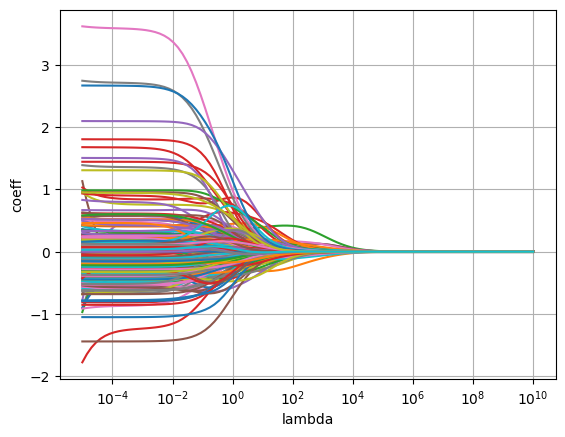

Best Lambda Value:
1.41747

Log of Best Lambda Value:
0.15152

Best Lambda At:
x = 10^0.15152



In [ ]:

# ------------------------------
#   Visualize Ridge Coeff List
# ------------------------------

# Visualize the coefficient list
ax = plt.gca()

# Plotting ridge_training_coeff vs lambdas
ax.plot(lambda_vals, ridge_training_coeff)

ax.set_xscale('log')
plt.axis('tight')

plt.xlabel('lambda')
plt.ylabel('coeff')

plt.grid(True)
plt.show()



# -------------
#   Ridge CV
# -------------

# Use RidgeCV for the best lambda & fit with scaled x&y
# Uses Leave One Out for CV
ridge_training_cv = RidgeCV(alphas = lambda_vals, store_cv_results = False, cv=8)
ridge_training_cv.fit(x_final, y_final)

# Assign a with the best alpha value
a = ridge_training_cv.alpha_

# Print best alpha values and location of graph
print(f'Best Lambda Value:\n{a:.5f}')
print(f'\nLog of Best Lambda Value:\n{np.log10(a):.5f}\n')
print(f'Best Lambda At:\nx = 10^{np.log10(a):.5f}\n')






### Best Ridge Model (Finding Tolerance & Max Iteration Hyperparameters)


In [ ]:
# --------------------------
#   Finding Best Tolerance
#           &
#   Finding Best Iteration
#           &
#     Best Ridge Model
# --------------------------

tol = [0.01, 0.001, 0.0001]
iter = [100, 1000, 10000]

mse =[]
r2 = []
k=0
# Train, fit, and predict another ridge regression
# with best lambda/alpha value found above
for i in range(3):
  for j in range(3):

    # Test hyperparameters tol & max_iter with best lambda value
    best_ridge = Ridge(alpha = a,
                      fit_intercept = True,
                      tol = tol[i],
                      max_iter = iter[j],
                      solver='sag')

    # Train Model & Predict Model
    best_ridge.fit(x_scaled_train, y_scaled_train)
    best_ridge_preds = best_ridge.predict(x_scaled_test)

    # Print MSE
    print(f'Index {k}')
    print(f'Tolerance, Max Iteration:{tol[i]}, {iter[j]}')
    print('MSE:',mean_squared_error(y_scaled_test, best_ridge_preds))

    # Print R2 Score
    print('R2:',r2_score(y_scaled_test, best_ridge_preds),'\n')

    # Append MSE & R2 scores in their lists
    mse.append(mean_squared_error(y_scaled_test, best_ridge_preds))
    r2.append(r2_score(y_scaled_test, best_ridge_preds))

    k=k+1

# Calculate indices of Min MSE and Max R2
a = mse.index(min(mse))
b = r2.index(max(r2))

print(f'You are appending 9 MSE and R2 values in their respecitve lists\n'+
      f'The index tells you what which Tolerance/Iteration Pair is the best')

print(f'Index of Min MSE: {a}\n' +
      f'Index of Max R2: {b}')



Index 0
Tolerance, Max Iteration:0.01, 100
MSE: 0.16338146197439346
R2: 0.7737976816884632 

Index 1
Tolerance, Max Iteration:0.01, 1000
MSE: 0.16216346564644527
R2: 0.7754840027052258 

Index 2
Tolerance, Max Iteration:0.01, 10000
MSE: 0.16207088942521153
R2: 0.7756121748712141 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Index 3
Tolerance, Max Iteration:0.001, 100
MSE: 0.15715370389777342
R2: 0.7824200388261147 

Index 4
Tolerance, Max Iteration:0.001, 1000
MSE: 0.15655024356588804
R2: 0.7832555321827779 

Index 5
Tolerance, Max Iteration:0.001, 10000
MSE: 0.15655917252987947
R2: 0.7832431699947391 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Index 6
Tolerance, Max Iteration:0.0001, 100
MSE: 0.15710581474636098
R2: 0.7824863415567952 

Index 7
Tolerance, Max Iteration:0.0001, 1000
MSE: 0.1563121311507465
R2: 0.7835851998187072 

Index 8
Tolerance, Max Iteration:0.0001, 10000
MSE: 0.15631227393615527
R2: 0.7835850021317108 

You are appending 9 MSE and R2 values in their respecitve lists
The index tells you what which Tolerance/Iteration Pair is the best
Index of Min MSE: 7
Index of Max R2: 7


## Lasso

### Finding Best Alpha/Lambda Value

In [ ]:

# We will use the lambda_vals list from ridge regression
lasso = Lasso()
lasso_training_coeff = []



# ---------------------
#  Create Alpha Values
# ---------------------

# Create 100 lambda values
# I shrank the lambda values ranges but still provided
# low and high values to make coeff. estimates but also
# drive coeff down to zero for higher lambda vals
lambda_vals = np.logspace(-5,10,100)

# Training & Fitting with each lambda val
# Appending 271 estimated coeff. into lasso_training_coeff
# for each lambda val.
for val in lambda_vals:
  lasso.set_params(alpha = val, max_iter=100000)
  lasso.fit(x_scaled_train, y_scaled_train)
  lasso_training_coeff.append(lasso.coef_)




In [ ]:

# ---------------------------------------
#   Viewing Estimated Coefficients List
#               For Lasso
# ---------------------------------------

lasso_training_coeff[0]



array([ 0.00000000e+00, -6.62075318e-03,  2.85275088e-01, -7.24680917e-02,
        5.64588670e-01, -2.41373401e-01,  1.06957577e-01,  4.43304256e-02,
        6.08561381e-03, -1.52346047e-01, -1.82552745e-02, -1.08948166e-01,
       -3.90699072e-01,  0.00000000e+00, -1.92150341e-01,  3.09148006e-01,
        4.67527831e-02, -0.00000000e+00,  7.62443513e-01,  3.29265023e-03,
        7.21380337e-03, -4.53462287e-01, -0.00000000e+00,  8.48907427e-01,
        1.55743798e-01,  1.81045325e-01, -5.46550160e-01, -7.08977435e-02,
        1.08596445e-01, -4.34158803e-01, -7.16499107e-02, -1.74487516e-01,
        1.95251701e-01,  2.93194722e-01,  5.09297760e-02, -1.12922081e-01,
        3.16481984e-03, -0.00000000e+00, -1.79904529e-01,  1.40392641e-01,
       -2.59797766e-02,  4.36276757e-01, -5.23184200e-02, -6.65121511e-01,
        1.05750285e-04, -6.41906883e-01,  2.62299133e-01,  8.11001182e-02,
       -1.58059083e-12, -5.23636550e-03,  1.12161495e-14,  2.00510231e-01,
       -4.24326968e-17, -

Best Lambda Value:
0.00046

Log of Best Lambda Value:
-3.33333

Best Lambda At:
x = 10^-3.33333



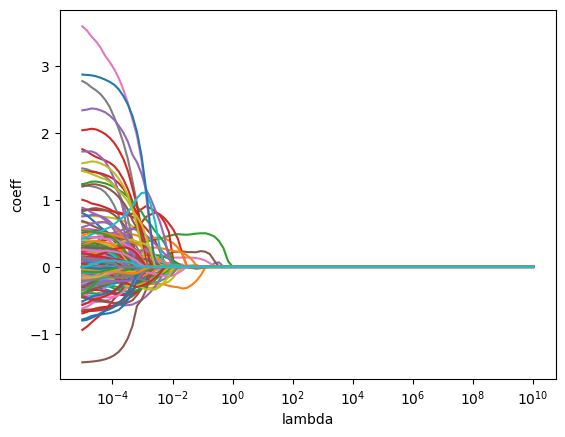

In [ ]:

# -----------------------------
#   Visualize Lasso Coeff List
# -----------------------------

# Plotting each list of 271 est. pred in lasso_training_coeff list
# vs lambda/alpha values. This shows convergence each convergence.
ax = plt.gca()
ax.plot(lambda_vals, lasso_training_coeff)

ax.set_xscale('log')
plt.axis('tight')

plt.xlabel('lambda')
plt.ylabel('coeff');



# -------------
#   Lasso CV
# -------------

# CV for lasso to find best alpha/lambda value
# if we want to say how many k-folds we say cv='1' by default its 5
lasso_cv = LassoCV(alphas = lambda_vals,
                   cv=8,
                   max_iter=100000,
                   fit_intercept = True,
                   positive = True)

lasso_cv.fit(x_final, y_final)

# Assign a with the best alpha value
a = lasso_cv.alpha_

# Print best alpha values and location of graph
print(f'Best Lambda Value:\n{a:.5f}')
print(f'\nLog of Best Lambda Value:\n{np.log10(a):.5f}\n')
print(f'Best Lambda At:\nx = 10^{np.log10(a):.5f}\n')




### Best Lasso Model (Finding Tolerance & Max Iteration Hyperparameters)


In [ ]:


# --------------------------
#   Finding Best Tolerance
#           &
#   Finding Best Iteration
#           &
#     Best Lasso Model
# --------------------------

tol = [0.01, 0.001, 0.0001]
iter = [100, 1000, 10000]

mse =[]
r2 = []
k=0
# Train, fit, and predict another ridge regression
# with best lambda/alpha value found above
for i in range(3):
  for j in range(3):
    # Test hyperparameters tol & max_iter with best lambda value
    best_lasso = Lasso(alpha = a,
                       fit_intercept = True,
                       tol = tol[i],
                       max_iter = iter[j],
                       selection='cyclic',
                       positive = True)

    # Train Model & Predict Model
    best_lasso.fit(x_scaled_train, y_scaled_train)
    best_lasso_preds = best_lasso.predict(x_scaled_test)

    # Print MSE
    print(f'Index {k}')
    print(f'Tolerance: {tol[i]}, Max Iteration: {iter[j]}')
    print('MSE:',mean_squared_error(y_scaled_test, best_lasso_preds))

    # Print R2 Score
    print('R2:',r2_score(y_scaled_test, best_lasso_preds),'\n')

    # Append MSE & R2 scores in their lists
    mse.append(mean_squared_error(y_scaled_test, best_lasso_preds))
    r2.append(r2_score(y_scaled_test, best_lasso_preds))

    k=k+1

# Calculate indices of Min MSE and Max R2
a = mse.index(min(mse))
b = r2.index(max(r2))

print(f'You are appending 9 MSE and R2 values in their respecitve lists\n'+
      f'The index tells you what which Tolerance/Iteration Pair is the best')

print(f'Index of Min MSE: {a}\n' +
      f'Index of Max R2: {b}')




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e+01, tolerance: 1.064e+01
  model = cd_fast.enet_coordinate_descent(


Index 0
Tolerance: 0.01, Max Iteration: 100
MSE: 0.1606239693380789
R2: 0.7776154417912532 

Index 1
Tolerance: 0.01, Max Iteration: 1000
MSE: 0.16055329739814522
R2: 0.777713287388051 

Index 2
Tolerance: 0.01, Max Iteration: 10000
MSE: 0.16055329739814522
R2: 0.777713287388051 

Index 3
Tolerance: 0.001, Max Iteration: 100
MSE: 0.1606239693380789
R2: 0.7776154417912532 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e+01, tolerance: 1.064e+00
  model = cd_fast.enet_coordinate_descent(


Index 4
Tolerance: 0.001, Max Iteration: 1000
MSE: 0.16032862596517822
R2: 0.7780243459278715 

Index 5
Tolerance: 0.001, Max Iteration: 10000
MSE: 0.16032862596517822
R2: 0.7780243459278715 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e+01, tolerance: 1.064e-01
  model = cd_fast.enet_coordinate_descent(


Index 6
Tolerance: 0.0001, Max Iteration: 100
MSE: 0.1606239693380789
R2: 0.7776154417912532 

Index 7
Tolerance: 0.0001, Max Iteration: 1000
MSE: 0.1602983408747045
R2: 0.7780662757624602 

Index 8
Tolerance: 0.0001, Max Iteration: 10000
MSE: 0.1602983408747045
R2: 0.7780662757624602 

You are appending 9 MSE and R2 values in their respecitve lists
The index tells you what which Tolerance/Iteration Pair is the best
Index of Min MSE: 7
Index of Max R2: 7


## PCA

In [15]:
len(x_final.columns)

270

In [16]:
# Create and fit PCA model
pca_model = PCA(n_components = len(x_final.columns))

pca_model.fit(x_final)

# Eigen vectors
eigen_vectors = pca_model.transform(x_final)
print('Eigen Vectors')
print(eigen_vectors)

# Eigne values / Variance Explained by Each Component
explained_variance = pca_model.explained_variance_
print(f'\n\nExplained variance by each component / Eigen Values')
print(f'{explained_variance}\n\n')

# Percent of variance explained by each component
percent_explained_variance = pca_model.explained_variance_ratio_
print(f'Percent of Information Explained by Each Predictor\n{percent_explained_variance}\n')



Eigen Vectors
[[-3.75042936e-01  3.03563380e+00  9.21251408e-02 ...  1.33226763e-15
   1.44328993e-15 -7.77156117e-16]
 [-2.14772409e+00  4.90337354e-01 -1.17907868e+00 ...  3.55271368e-15
   9.99200722e-16 -8.88178420e-16]
 [-3.34565244e-01  9.95540400e-02 -1.38891536e-01 ...  3.44169138e-15
   1.22124533e-15 -3.88578059e-16]
 ...
 [-7.91968961e-01  1.22174985e+00 -7.23697004e-01 ...  3.44169138e-15
   1.22124533e-15 -1.05471187e-15]
 [ 9.02496569e-01  4.22137002e+00  1.64488824e+00 ...  3.44169138e-15
   7.77156117e-16 -1.05471187e-15]
 [-1.03848148e+00 -2.21737533e+00  1.19214962e+00 ...  3.44169138e-15
   1.44328993e-15 -8.88178420e-16]]


Explained variance by each component / Eigen Values
[3.35558582e+00 2.57261271e+00 1.40751470e+00 9.42159723e-01
 6.34801414e-01 4.92947451e-01 4.30500585e-01 3.66593489e-01
 3.10055339e-01 2.75411488e-01 2.47506961e-01 2.21345916e-01
 2.15140453e-01 2.02955601e-01 1.60757698e-01 1.50798697e-01
 1.40492620e-01 1.24566503e-01 1.11425162e-01 9.9070

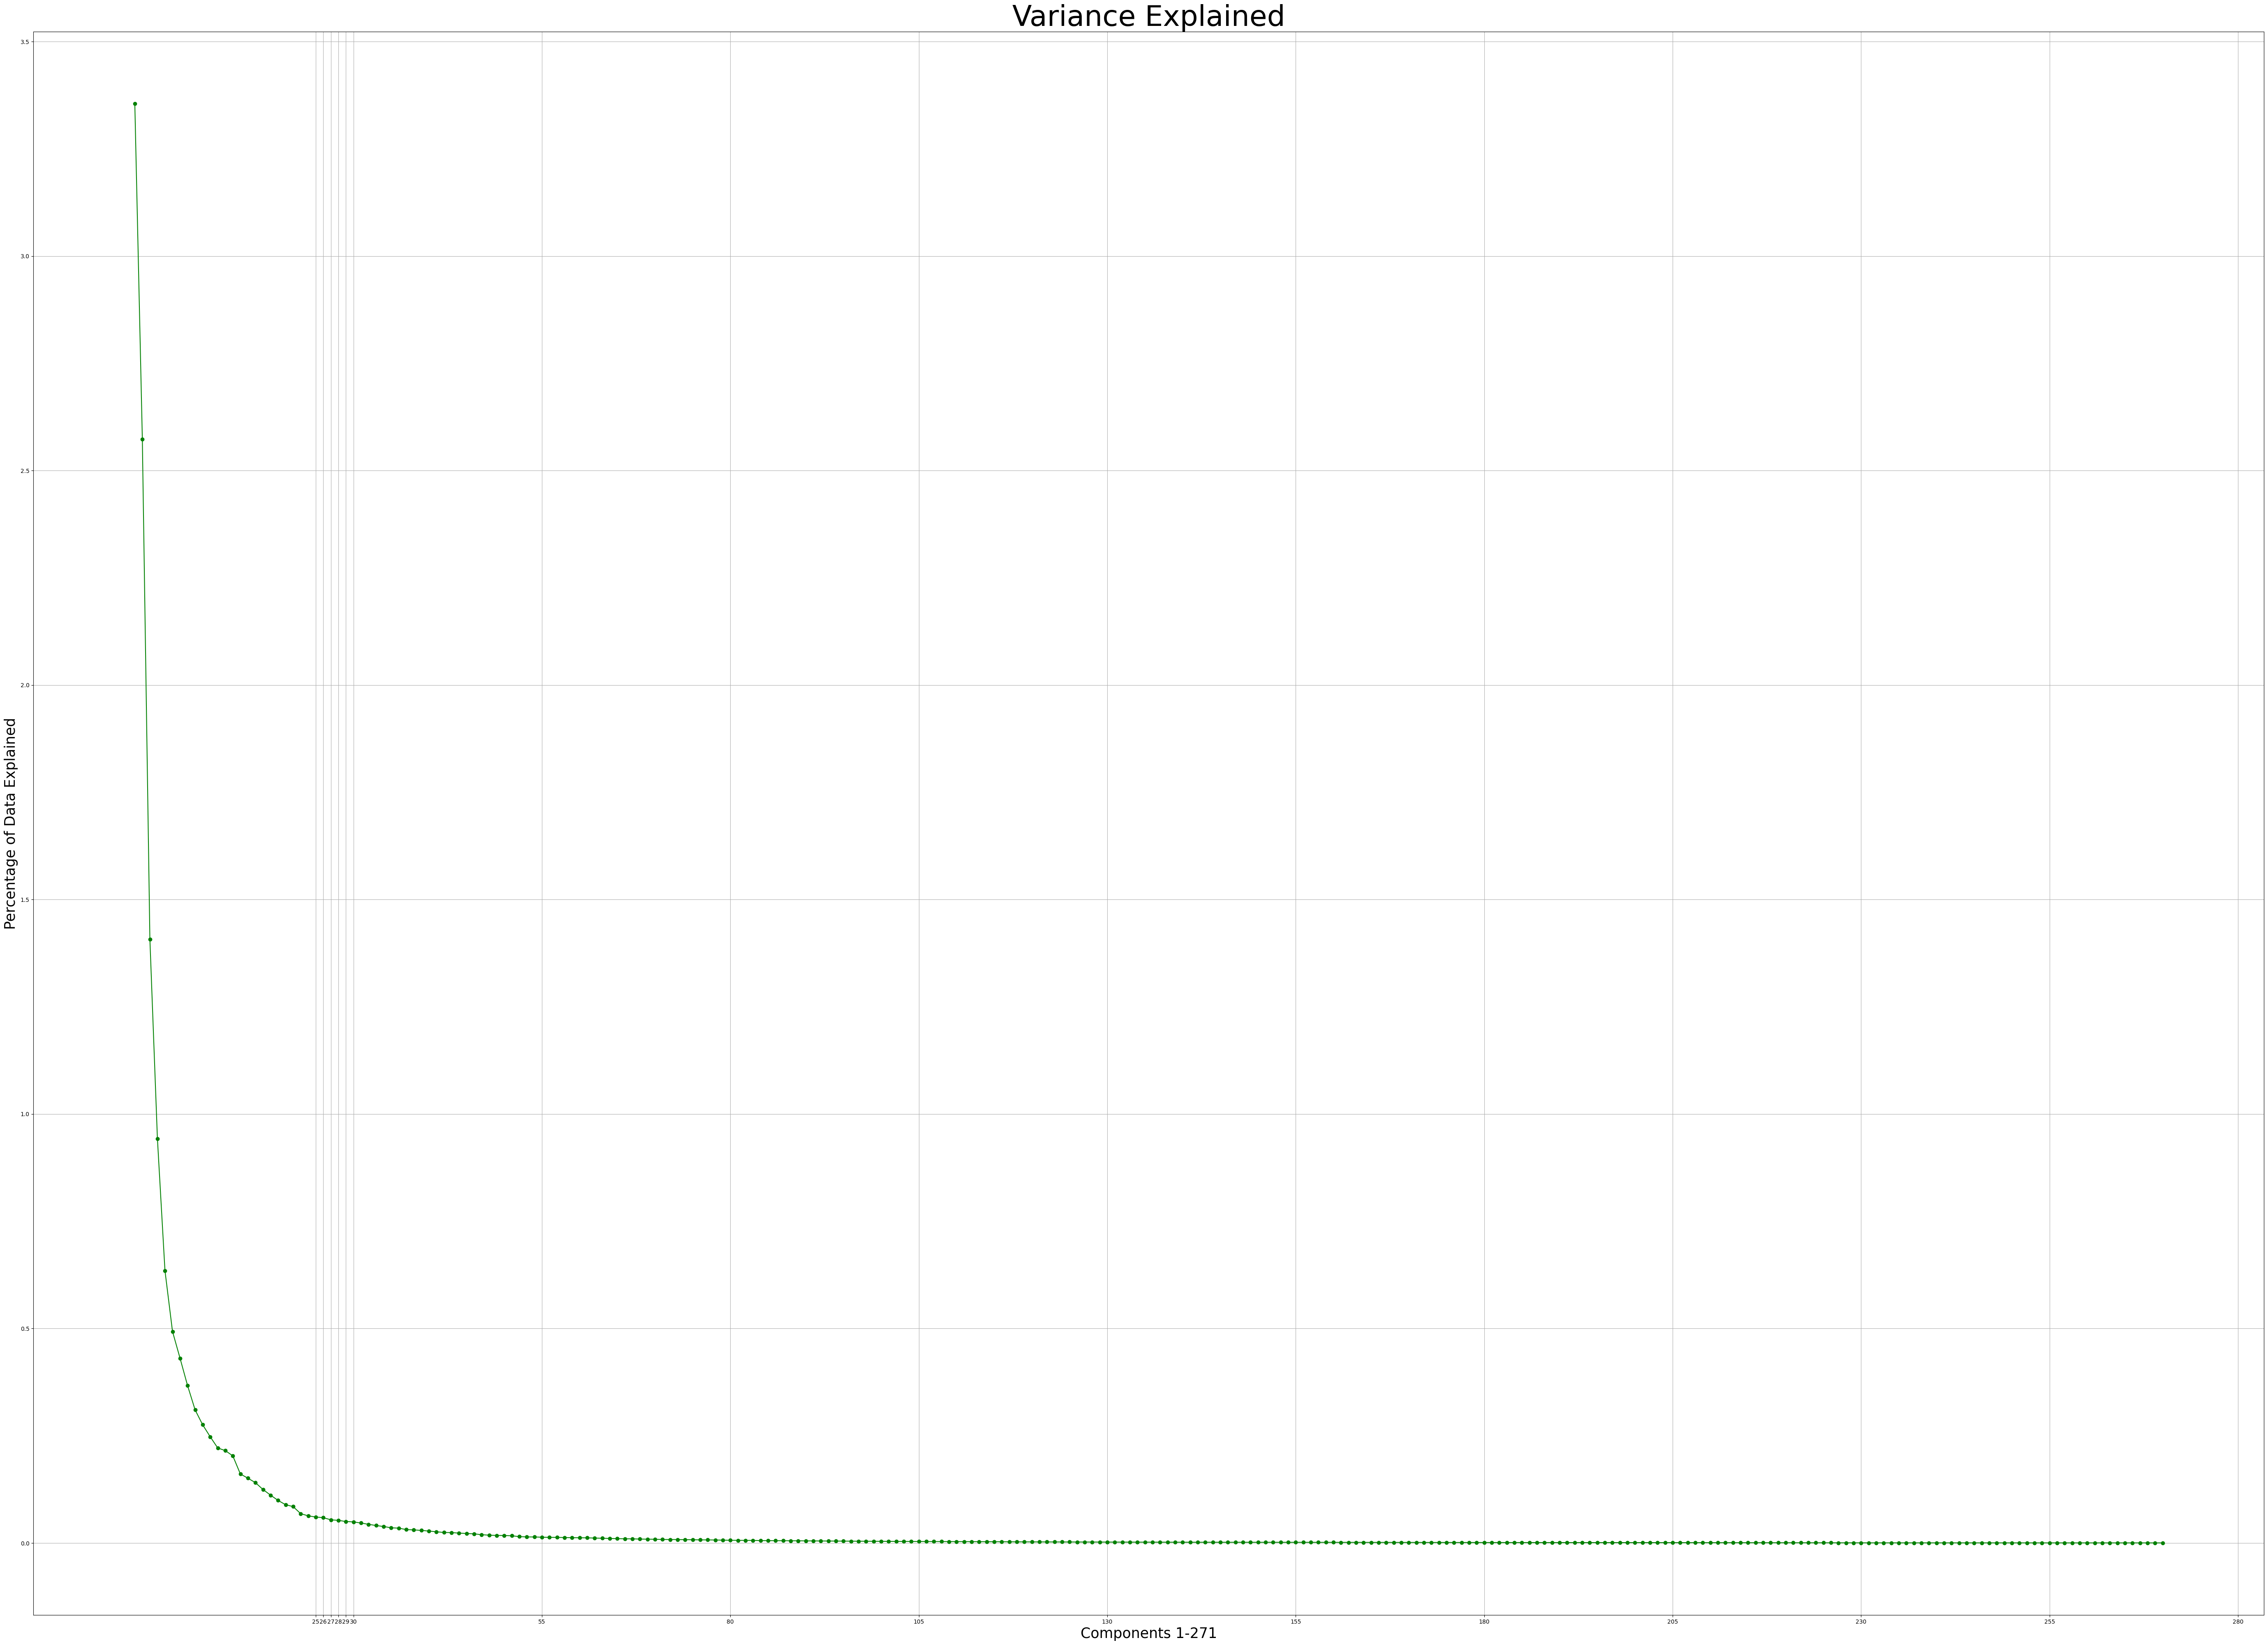

In [17]:


# -------------------------------
#  Visualize Explained Variance
# -------------------------------

ticks = []
for i in range(len(x_final.columns)):
  ticks.append(i+1)

plt.figure(figsize=(70,50))

plt.plot(ticks, pca_model.explained_variance_, 'o-', color='green')

ticks_1_50 = np.arange(25, 30, 1)  # Ticks from 1 to 50 with step 1
ticks_51_270 = np.arange(30, 300, 25)  # Ticks from 51 to 300 with step 50
ticks = np.concatenate([ticks_1_50, ticks_51_270])
plt.xticks(ticks)

plt.title(f'Variance Explained', fontsize=50)
plt.xlabel(f'Components 1-271', fontsize=25)
plt.ylabel(f'Percentage of Data Explained', fontsize=25)
plt.grid(True)
plt.show()



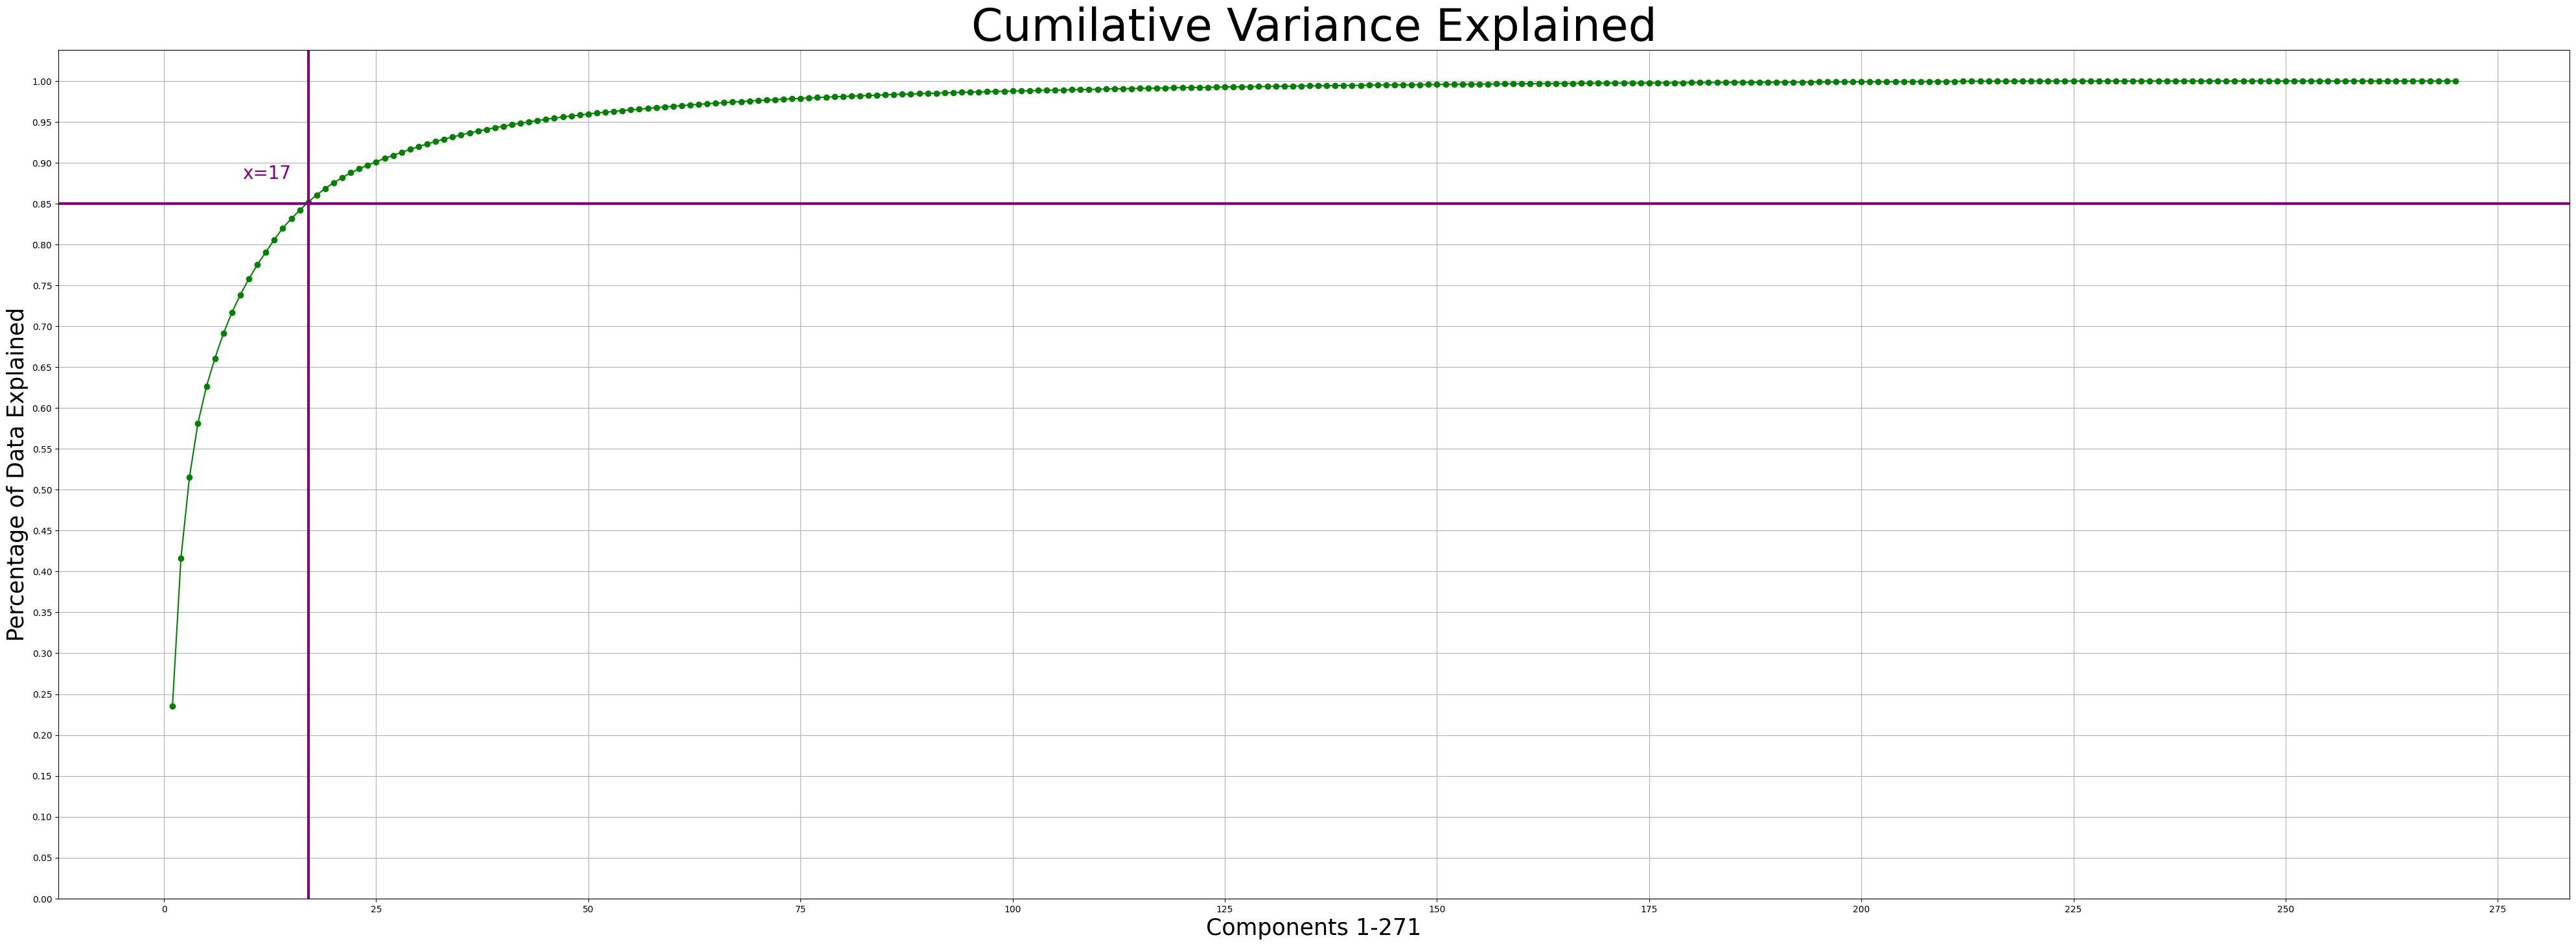

In [18]:

# Visualize the cumulative variance explained
cum_variance = np.cumsum(pca_model.explained_variance_ratio_)

ticks = []
for i in range(len(x_final.columns)):
  ticks.append(i+1)

plt.figure(figsize=(50,17))
plt.plot(ticks, cum_variance, 'o-', color='green')

plt.xticks(np.arange(0,300, 25))
plt.yticks(np.arange(0,1.05, 0.05))

plt.axhline(0.85, color='purple',linewidth=3) # x-axis
plt.axvline(17, color='purple',linewidth=3)  # y-axis
plt.text(15, 0.88, 'x=17', color='purple', ha='right', fontsize=20)

plt.title(f'Cumilative Variance Explained', fontsize=50)
plt.xlabel(f'Components 1-271', fontsize=25)
plt.ylabel(f'Percentage of Data Explained', fontsize=25)
plt.grid(True)
plt.show()




## Linear Regression w/ PCA Model

In [19]:
# We see from the the scree and cumulative plot that these ranges work best at
# producing the closest test and training MSE while also giving a decent
# R2 score. We should that in the output.

train_mse_list = []
train_r2_list = []

test_mse_list = []
test_r2_list = []

# The range of amount of components that we iterate through

range_list = [17, 18, 19,
              20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
              30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
              40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
              50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
              60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
              70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
              80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
              90, 91, 92, 93, 94, 95, 96, 97, 98, 99,
              100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
              110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
              120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
              130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
              140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]


# For each value in the list we create new lists and train and test the linear model
for r in range_list:
  num = r

  components_list = []
  column_names = []
  for i in range(0, num):

    # For each number in range list we create a PCA model of that many components
    components_list.append(i)
    column_names.append(f'PC{i+1}')

    # pca_model selects the number of components and renames the column names
    # pca_model is also its own data frame
    pca_model = eigen_vectors[:, components_list]
    pca_model = pd.DataFrame(pca_model, columns=column_names)

  # Assign x_pca & y_pca for linear model
  x_pca = pca_model
  x_pca = sm.add_constant(pca_model)
  y_pca = y_final

  # Train, Test Split, Predict mlr model
  x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y_pca, test_size=0.2, random_state = 8)
  mlr = LinearRegression()
  mlr.fit(x_pca_train, y_pca_train)


  # Calculate Training MSE & R2
  preds_train = mlr.predict(x_pca_train)
  mse_train = mean_squared_error(y_pca_train, preds_train)
  r2_train = r2_score(y_pca_train, preds_train)

  train_mse_list.append(mse_train)
  train_r2_list.append(r2_train)


  # Calculate Test MSE & R2
  preds_test = mlr.predict(x_pca_test)
  mse_test = mean_squared_error(y_pca_test, preds_test)
  r2_test = r2_score(y_pca_test, preds_test)

  test_mse_list.append(mse_test)
  test_r2_list.append(r2_test)




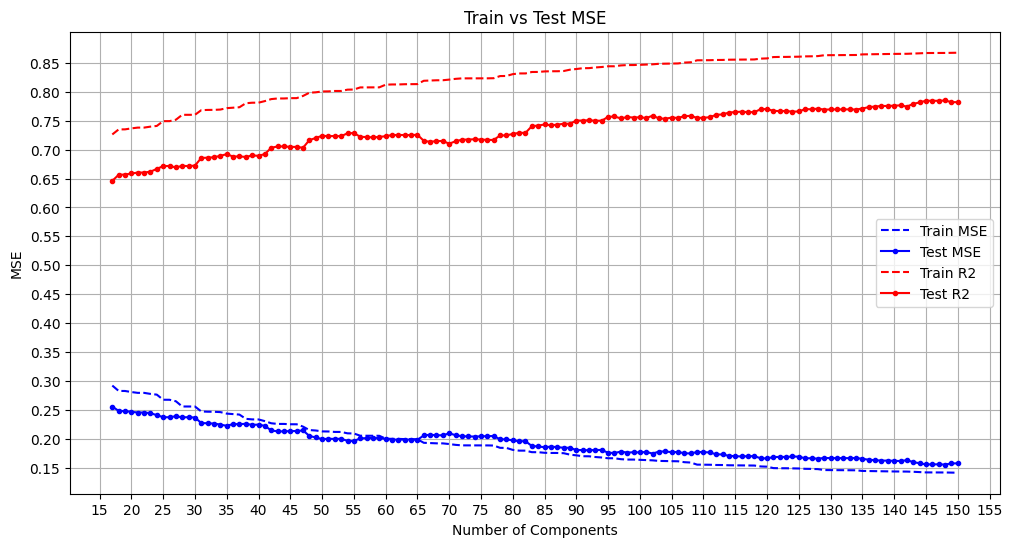

In [20]:
# Graph the training and testing mse & R2 values against the
# number of components for PCA

plt.figure(figsize=(12,6))

plt.title(f'Train vs Test MSE')
plt.xlabel(f'Number of Components')
plt.ylabel(f'MSE')

plt.xticks(np.arange(15,160,5))
plt.yticks(np.arange(0.10, 0.90, 0.05))

plt.plot(range_list, train_mse_list, 'b--', label='Train MSE')
plt.plot(range_list, test_mse_list, 'b.-', label='Test MSE')
plt.plot(range_list, train_r2_list, 'r--', label='Train R2')
plt.plot(range_list, test_r2_list, 'r.-', label='Test R2')
plt.legend()
plt.grid(True)




In [25]:

# Print out OLS table with ideal number of components

comp_name_list = []   # PC1 to PC117
comp_range_list = []  # Eigen vector columns 0 to 116

for j in range(117):
  comp_name_list.append(f'PC{j+1}')
  comp_range_list.append(j)

pca_mlr = eigen_vectors[:, comp_range_list]
pca_mlr = pd.DataFrame(pca_mlr, columns=comp_name_list)

# Assign x_pca & y_pca for linear model
x_pca = pca_mlr
x_pca = sm.add_constant(x_pca)
y_pca = y_final

# Train, Test Split, Predict mlr model
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca,
                                                                    y_pca,
                                                                    test_size=0.2,
                                                                    random_state = 8)
mlr = LinearRegression()
mlr.fit(x_pca_train, y_pca_train)


# Calculate Test MSE & R2
preds_test = mlr.predict(x_pca_test)
mse_test = mean_squared_error(y_pca_test, preds_test)
r2_test = r2_score(y_pca_test, preds_test)

print(f'Test MSE: {mse_test}')
print(f'Test R2: {r2_test}\n\n')

Test MSE: 0.16983027869558703
Test R2: 0.7648692679316514




In [26]:
# Make sure indices are aligned
pca_mlr = pca_mlr.reset_index(drop=True)  # Drop the old index and reset to default
y_pca = y_pca.reset_index(drop=True)  # Ensure the target variable has the same index

# Print OLS regression
res = sm.OLS(y_pca, pca_mlr).fit()
print(res.summary())


                                 OLS Regression Results                                
Dep. Variable:            Price_euros   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              53.59
Date:                Fri, 29 Nov 2024   Prob (F-statistic):                        0.00
Time:                        05:43:17   Log-Likelihood:                         -598.60
No. Observations:                1248   AIC:                                      1431.
Df Residuals:                    1131   BIC:                                      2031.
Df Model:                         117                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Find which features belongs to which components

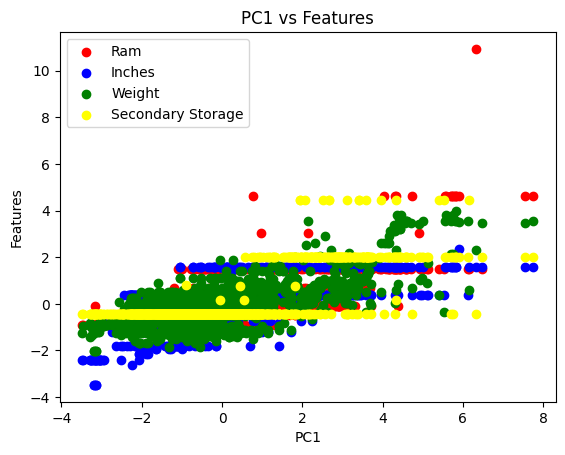

In [149]:

# PC1
plt.scatter(x=pca_mlr['PC1'], y=x_final['Ram'], color='red', label='Ram')
plt.scatter(x=pca_mlr['PC1'], y=x_final['Inches'], color='blue', label='Inches')
plt.scatter(x=pca_mlr['PC1'], y=x_final['Weight'], color='green', label='Weight')
plt.scatter(x=pca_mlr['PC1'], y=x_final['SecondaryStorage'], color='yellow', label='Secondary Storage')

plt.title(f'PC1 vs Features')
plt.xlabel(f'PC1')
plt.ylabel(f'Features')

plt.legend()
plt.show()



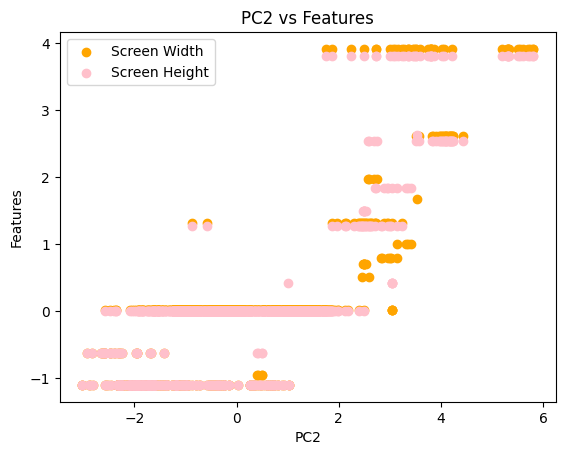

In [150]:

# PC2
plt.scatter(x=pca_mlr['PC2'], y=x_final['ScreenW'], color='orange', label='Screen Width')
plt.scatter(x=pca_mlr['PC2'], y=x_final['ScreenH'], color='pink', label='Screen Height')

plt.title(f'PC2 vs Features')
plt.xlabel(f'PC2')
plt.ylabel(f'Features')

plt.legend()
plt.show()



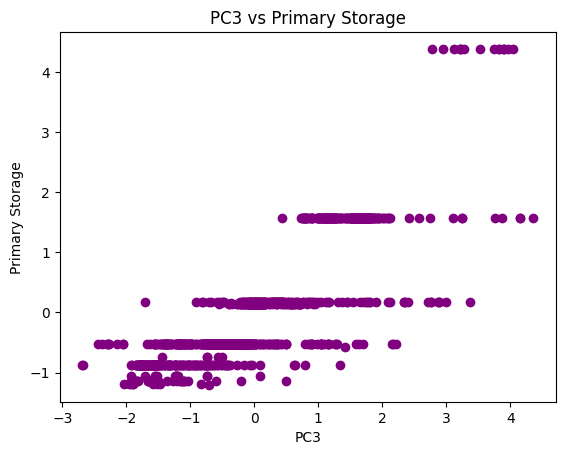

In [151]:

# PC3
plt.scatter(x=pca_mlr['PC3'], y=x_final['PrimaryStorage'], color='purple')

plt.title(f'PC3 vs Primary Storage')
plt.xlabel(f'PC3')
plt.ylabel(f'Primary Storage')
plt.show()



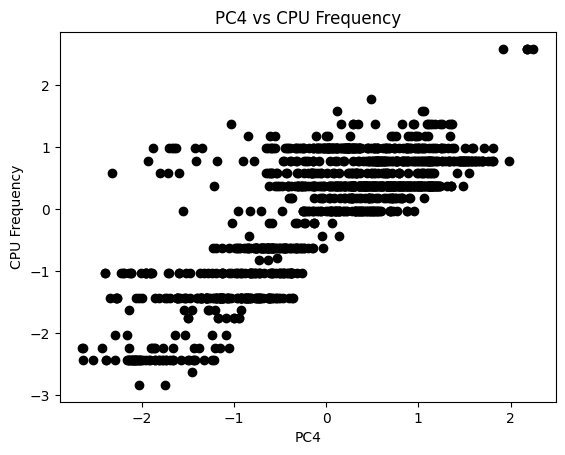

In [152]:

# PC4
plt.scatter(x=pca_mlr['PC4'], y=x_final['CPU_freq'], color='black')

plt.title(f'PC4 vs CPU Frequency')
plt.xlabel(f'PC4')
plt.ylabel(f'CPU Frequency')
plt.show()
